In [31]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
file = r'/Users/zhaoxu/Library/CloudStorage/OneDrive-Personal/Scientific Research/Code/Jupyter_YPI/heds/TestData/Helios/Sesame_2eV.exo'
data = xr.open_dataset(file)

In [32]:
# 获取所有变量的名称、维度和属性信息
variables_info = []

for var_name, var_data in data.variables.items():
    # 获取维度信息，并保持小括号格式
    dims_with_sizes = tuple(f"{dim}: {data.dims[dim]}" for dim in var_data.dims)
    
    info = var_data.attrs.get('info', None)  # 获取 'info' 属性
    units = var_data.attrs.get('units', None)  # 获取 'units' 属性
    variables_info.append([var_name, dims_with_sizes, info, units])

# 转换为 Pandas DataFrame
variables_df = pd.DataFrame(variables_info, columns=['Variable Name', 'Dimensions', 'Info', 'Units'])
variables_df

,Variable Name,Dimensions,Info,Units
0,time_whole,"(num_times: 502,)",Time [sec],sec
1,cycle_num,"(num_times: 502,)",Cycle count,
2,Time step size [sec],"(num_times: 502,)",Time step size [sec],sec
3,CR has started,"(num_times: 502,)","CR calculation used for timestep (0 = no, 1 = yes)",
4,zone_boundaries,"(num_times: 502, num_nodes: 101)",Zone boundary [cm],cm
...,...,...,...,...
108,Isotope index of element in each Propaceos material,"(num_materials: 1, max_num_opacity_element: 2)",Isotope index of element in each Propaceos material,
109,Relative fraction of element in each Propaceos material,"(num_materials: 1, max_num_opacity_element: 2)",Relative fraction of element in each Propaceos material,
110,Min ion stage of element in each Propaceos material,"(num_materials: 1, max_num_opacity_element: 2)",Min ion stage of element in each Propaceos material,
111,Max ion stage of element in each Propaceos material,"(num_materials: 1, max_num_opacity_element: 2)",Max ion stage of element in each Propaceos material,


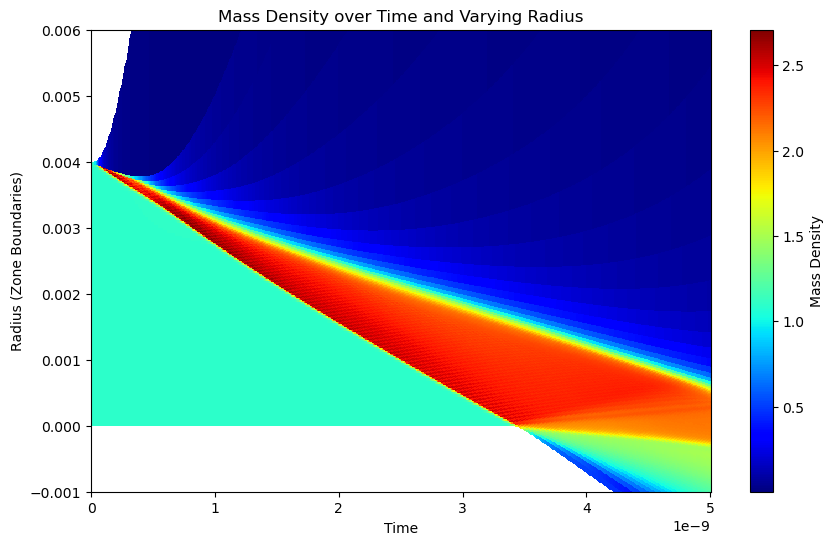

In [104]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 加载数据
file = r'/Users/zhaoxu/Library/CloudStorage/OneDrive-Personal/Scientific Research/Code/Jupyter_YPI/heds/TestData/Helios/Sesame_2eV.exo'
data = xr.open_dataset(file)

time = data['time_whole'].values  # 转换为 numpy 数组
radius = data['zone_boundaries'].values  # 转换为 numpy 数组
density = data['mass_density'].values  # 转换为 numpy 数组
ElecTemp = data['elec_temperature'].values 

# 计算时间的边缘坐标
time_diff = np.diff(time) / 2
time_edges = np.concatenate(([time[0] - time_diff[0]], time[:-1] + time_diff, [time[-1] + time_diff[-1]]))

# 计算半径的边缘坐标
radius_diff = np.diff(radius, axis=0) / 2
radius_edges = np.vstack((radius[0, :] - radius_diff[0, :],
                          radius[:-1, :] + radius_diff,
                          radius[-1, :] + radius_diff[-1, :]))

# 绘制图像
plt.figure(figsize=(10, 6))
plt.pcolormesh(time_edges,radius_edges.T, density.T, shading='auto', cmap='jet',
               vmin= 0.0006202, vmax = 2.708)
plt.colorbar(label='Mass Density')
plt.xlabel('Time')
plt.ylabel('Radius (Zone Boundaries)')
plt.title('Mass Density over Time and Varying Radius')
plt.ylim(-10e-4, 60e-4)
plt.show(block=True)

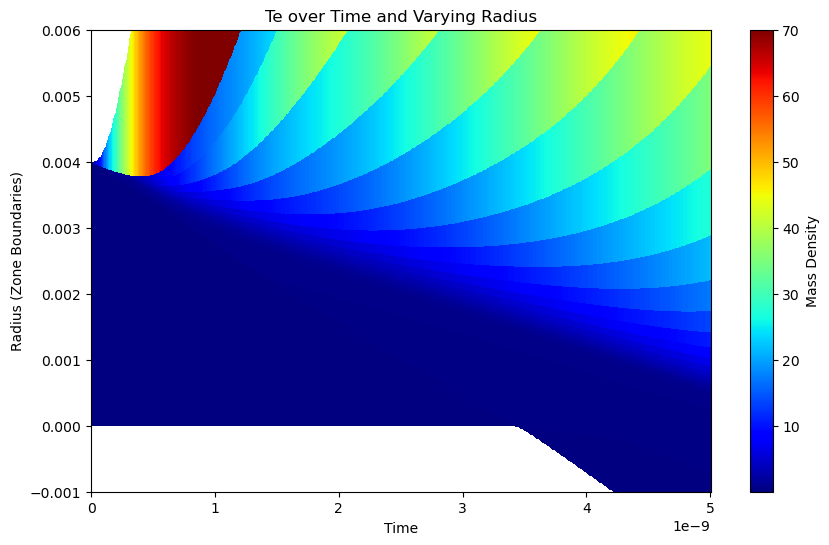

In [106]:
# 绘制图像
plt.figure(figsize=(10, 6))
plt.pcolormesh(time_edges,radius_edges.T, ElecTemp.T, shading='auto', cmap='jet',
               vmin=0.025 , vmax = 70)
plt.colorbar(label='Mass Density')
plt.xlabel('Time')
plt.ylabel('Radius (Zone Boundaries)')
plt.title('Te over Time and Varying Radius')
plt.ylim(-10e-4, 60e-4)
plt.show(block=True)

In [93]:
print(time.shape)
print(radius_adjusted.T.shape)
print(density.T.shape)

(502,)
(100, 502)
(100, 502)


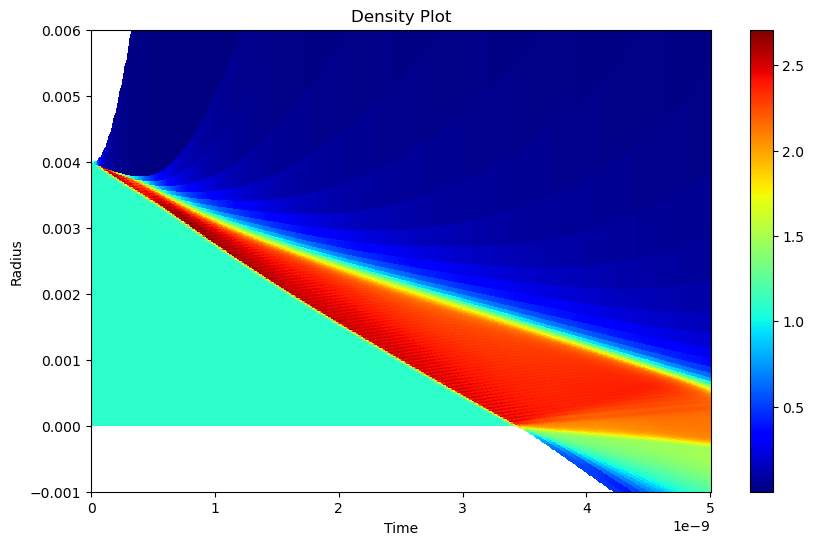

In [99]:
import numpy as np

# 计算时间的边缘坐标
time_diff = np.diff(time) / 2
time_edges = np.concatenate(([time[0] - time_diff[0]], time[:-1] + time_diff, [time[-1] + time_diff[-1]]))

# 计算半径的边缘坐标
radius_diff = np.diff(radius, axis=0) / 2
radius_edges = np.vstack((radius[0, :] - radius_diff[0, :],
                          radius[:-1, :] + radius_diff,
                          radius[-1, :] + radius_diff[-1, :]))
plt.figure(figsize=(10, 6))
plt.pcolormesh(time_edges,radius_edges.T, density.T, shading='auto', cmap='jet',
               vmin= 0.0006202, vmax = 2.708)
plt.colorbar()
plt.ylim(-10e-4, 60e-4)
plt.xlabel('Time')
plt.ylabel('Radius')
plt.title('Density Plot')
plt.show()

[1.00000000e-15 1.00000000e-11 2.00000000e-11 3.00000000e-11
 4.00000000e-11 5.00000000e-11 6.00000000e-11 7.00000000e-11
 8.00000000e-11 9.00000000e-11 1.00000000e-10 1.10000000e-10
 1.20000000e-10 1.30000000e-10 1.40000000e-10 1.50000000e-10
 1.60000000e-10 1.70000000e-10 1.80000000e-10 1.90000000e-10
 2.00000000e-10 2.10000000e-10 2.20000000e-10 2.30000000e-10
 2.40000000e-10 2.50000000e-10 2.60000000e-10 2.70000000e-10
 2.80000000e-10 2.90000000e-10 3.00000000e-10 3.10000000e-10
 3.20000000e-10 3.30000000e-10 3.40000000e-10 3.50000000e-10
 3.60000000e-10 3.70000000e-10 3.80000000e-10 3.90000000e-10
 4.00000000e-10 4.10000000e-10 4.20000000e-10 4.30000000e-10
 4.40000000e-10 4.50000000e-10 4.60000000e-10 4.70000000e-10
 4.80000000e-10 4.90000000e-10 5.00000000e-10 5.10000000e-10
 5.20000000e-10 5.30000000e-10 5.40000000e-10 5.50000000e-10
 5.60000000e-10 5.70000000e-10 5.80000000e-10 5.90000000e-10
 6.00000000e-10 6.10000000e-10 6.20000000e-10 6.30000000e-10
 6.40000000e-10 6.500000

In [74]:
print(time_edges.shape)
print(radius_edges.shape)
print(density.T.shape)

(502,)
(502, 100)
(100, 502)


In [65]:
time_edges.shape

(502,)

In [66]:
radius_edges.shape

(502, 100)

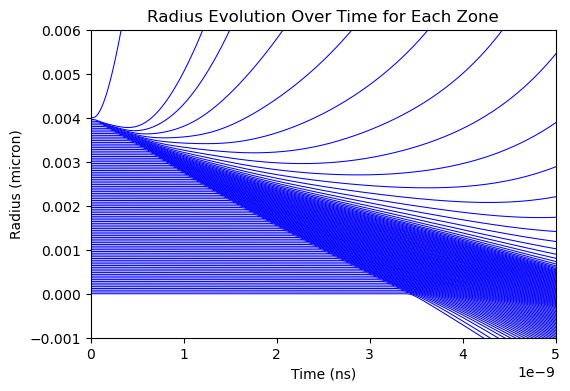

In [102]:
%matplotlib inline
plt.figure(figsize=(6, 4))

# 遍历每个 zone（每个半径位置），绘制 radius 随时间的变化
for i in range(radius.shape[1]):  # 对每个半径位置（zone）进行遍历
    plt.plot(time, radius[:, i], c = 'b', lw=0.75)  # 仅显示部分标签，避免过多标签重叠

plt.xlabel("Time (ns)")
plt.ylabel("Radius (micron)")
plt.title("Radius Evolution Over Time for Each Zone")
# plt.legend(loc='upper left', fontsize='small', ncol=2)  # 显示部分标签
plt.xlim(0,5e-9)
plt.ylim(-10e-4, 60e-4)
plt.show(block=True)

In [145]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

def load_and_process_data(file_path):
    # Load the dataset
    data = xr.open_dataset(file_path)

    # Extract variables and convert to numpy arrays
    time_whole = data['time_whole'].values
    zone_boundaries = data['zone_boundaries'].values
    mass_density = data['mass_density'].values
    elec_density = data['elec_density'].values
    ion_temperature = data['ion_temperature'].values
    elec_temperature = data['elec_temperature'].values
    zone_mass = data['zone_mass'].values
    # Calculate total pressure as the sum of ion and electron pressure
    pressure = data['ion_pressure'].values + data['elec_pressure'].values
    # Convert fluid velocity to km/s
    fluid_velocity = data['fluid_velocity'].values / 100000
    # Calculate volume from mass and density
    volume = zone_mass / mass_density

    # Calculate time edges for pcolormesh
    time_diff = np.diff(time_whole) / 2
    time_edges = np.concatenate(([time_whole[0] - time_diff[0]], time_whole[:-1] + time_diff, [time_whole[-1] + time_diff[-1]]))

    # Calculate radius edges for pcolormesh
    radius_diff = np.diff(zone_boundaries, axis=0) / 2
    radius_edges = np.vstack((zone_boundaries[0, :] - radius_diff[0, :],
                              zone_boundaries[:-1, :] + radius_diff,
                              zone_boundaries[-1, :] + radius_diff[-1, :]))

    # Return a dictionary of processed data
    return {
        "time_whole": time_whole,
        "zone_boundaries": zone_boundaries,
        "mass_density": mass_density,
        "elec_density": elec_density,
        "ion_temperature": ion_temperature,
        "elec_temperature": elec_temperature,
        "zone_mass": zone_mass,
        "pressure": pressure,
        "fluid_velocity": fluid_velocity,
        "volume": volume,
        "time_edges": time_edges,
        "radius_edges": radius_edges
    }

# Example usage
file = r'/Users/zhaoxu/Library/CloudStorage/OneDrive-Personal/Scientific Research/Code/Jupyter_YPI/heds/TestData/Helios/Sesame_2eV.exo'
data_dict = load_and_process_data(file)

# Access processed data, for example
print(data_dict['time_whole'])
print(data_dict['mass_density'])

In [132]:
import matplotlib.pyplot as plt

def plot_radius_evolution(time, radius, figsize=(8.5 / 2.54, 8.5/1.618 / 2.54), line_width=0.5,
                          line_color='black', font_size=7, font_family='Arial',
                          dpi=200, border_width=0.5, tick_length=3, tick_width=0.5):
    """
    Plots the evolution of radius over time for each zone.

    Parameters:
    - time: 1D array-like, time points.
    - radius: 2D array-like, radius values for each time and zone (shape: [time_steps, zones]).
    - figsize: tuple, figure size in inches, default (8.5 cm, 6.5 cm).
    - line_width: float, line width, default 0.75.
    - line_color: str, line color, default 'black'.
    - font_size: int, font size for labels and title, default 7.
    - font_family: str, font family for labels and title, default 'Arial'.
    - dpi: int, resolution of the figure in dots per inch, default 200.
    - border_width: float, width of the figure border, default 0.5.
    - tick_length: float, length of ticks on both axes, default 3.
    - tick_width: float, width of ticks on both axes, default 0.5.

    Returns:
    - ax: Matplotlib Axes object, for further customization.
    """
    # Convert figsize from cm to inches
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    # Plot the radius evolution over time for each zone
    for i in range(radius.shape[1]):
        ax.plot(time, radius[:, i], color=line_color, lw=line_width)

    # Set labels and title
    ax.set_xlabel("Time (ns)", fontsize=font_size, fontfamily=font_family)
    ax.set_ylabel(r"Radius ($\rm{\mu}$m)", fontsize=font_size, fontfamily=font_family)  # LaTeX for microns
    ax.set_title("Radius Evolution Over Time for Each Zone", fontsize=font_size, fontfamily=font_family)

    # Set font size and family for tick labels
    ax.tick_params(axis='both', which='major', labelsize=font_size, length=tick_length, width=tick_width)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname(font_family)

    # Set border width for all spines
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)

    # Return the Axes object for further customization
    return ax

# Example usage
# ax = plot_radius_evolution(time, radius)

(-10.0, 60.0)

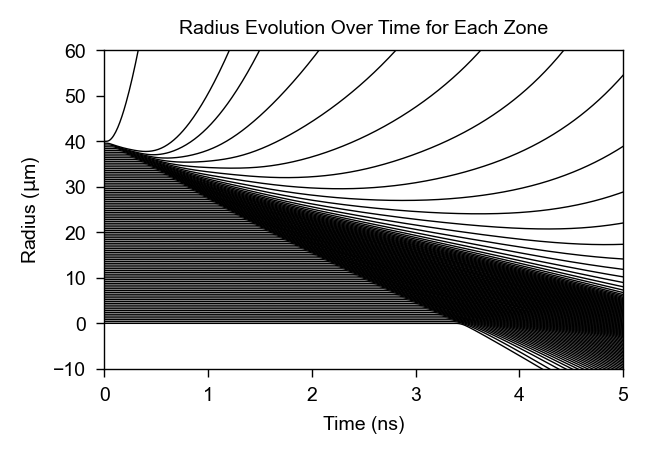

In [138]:
# Example usage
time = data_dict['time_whole']*1e9
radius = data_dict['zone_boundaries']*1e4

ax = plot_radius_evolution(time, radius,line_width=0.5)
ax.set_xlim(0,5)
ax.set_ylim(-10,60)

In [154]:


def plot_density_pcolormesh(time_edges, radius_edges, density, figsize=(8.5 / 2.54, 8.5/1.618 / 2.54),
                            cmap='jet', font_size=7, font_family='Arial',
                            dpi=200, border_width=0.5, tick_length=3, tick_width=0.5):
    """
    Plots a density pcolormesh with a color bar.

    Parameters:
    - time_edges: 1D array-like, edges for the time axis (will be scaled to ns).
    - radius_edges: 1D or 2D array-like, edges for the radius axis (will be scaled to microns).
    - density: 2D array-like, density values for each time and radius (shape: [time_steps, radius_zones]).
    - figsize: tuple, figure size in inches, default (10 cm, 6 cm).
    - cmap: str, colormap for the plot, default 'jet'.
    - font_size: int, font size for labels and title, default 7.
    - font_family: str, font family for labels and title, default 'Arial'.
    - dpi: int, resolution of the figure in dots per inch, default 200.
    - border_width: float, width of the figure border, default 0.5.
    - tick_length: float, length of ticks on both axes, default 3.
    - tick_width: float, width of ticks on both axes, default 0.5.

    Returns:
    - ax: Matplotlib Axes object, for further customization.
    """
    # Convert figsize from cm to inches
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    # Scale time and radius edges for ns and microns
    time_edges = time_edges * 1e9  # Convert time to ns
    radius_edges = radius_edges * 1e4  # Convert radius to microns

    # Plot pcolormesh for density data
    cmesh = ax.pcolormesh(time_edges, radius_edges.T, density.T, shading='auto', cmap=cmap)

    # Add color bar
    cbar = fig.colorbar(cmesh, ax=ax)
    cbar.ax.tick_params(labelsize=font_size, length=tick_length, width=tick_width)
    cbar.outline.set_linewidth(border_width)  # Set colorbar border thickness

    # Set colorbar label at the top and horizontal
    cbar_label = r"$\rho$ (g/cc)"
    cbar.ax.text(0.5, 1.02, cbar_label, ha='center', va='bottom', 
                 fontsize=font_size, fontfamily=font_family, transform=cbar.ax.transAxes)

    # Set labels and title
    ax.set_xlabel("Time (ns)", fontsize=font_size, fontfamily=font_family)
    ax.set_ylabel(r"Radius ($\rm{\mu}$m)", fontsize=font_size, fontfamily=font_family)
    ax.set_title("Density Plot", fontsize=font_size, fontfamily=font_family)

    # Set font size and family for tick labels
    ax.tick_params(axis='both', which='major', labelsize=font_size, length=tick_length, width=tick_width)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname(font_family)

    # Set border width for all spines
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)

    # Return the Axes object for further customization
    return ax

# Example usage
# ax = plot_density_pcolormesh(time_edges, radius_edges, density)
# Customize further if needed, e.g., ax.set_xlim(...)

(-10.0, 60.0)

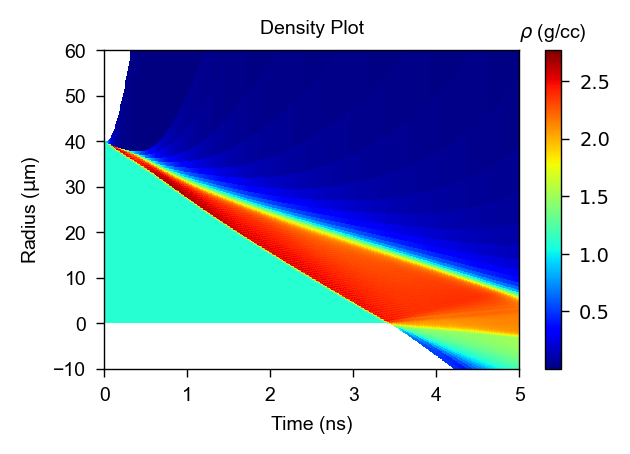

In [155]:
ax = plot_density_pcolormesh(time_edges, radius_edges, density)
ax.set_xlim(0,5)
ax.set_ylim(-10,60)

In [161]:

def plot_electron_temp_pcolormesh(time_edges, radius_edges, elec_temp, figsize=(8.5 / 2.54, 8.5/1.618 / 2.54),
                                  cmap='jet', font_size=7, font_family='Arial',
                                  dpi=200, border_width=0.5, tick_length=3, tick_width=0.5):
    """
    Plots an electron temperature (Te) pcolormesh with a color bar.

    Parameters:
    - time_edges: 1D array-like, edges for the time axis (will be scaled to ns).
    - radius_edges: 1D or 2D array-like, edges for the radius axis (will be scaled to microns).
    - elec_temp: 2D array-like, electron temperature values for each time and radius (shape: [time_steps, radius_zones]).
    - figsize: tuple, figure size in inches, default (10 cm, 6 cm).
    - cmap: str, colormap for the plot, default 'jet'.
    - font_size: int, font size for labels and title, default 7.
    - font_family: str, font family for labels and title, default 'Arial'.
    - dpi: int, resolution of the figure in dots per inch, default 200.
    - border_width: float, width of the figure border, default 0.5.
    - tick_length: float, length of ticks on both axes, default 3.
    - tick_width: float, width of ticks on both axes, default 0.5.

    Returns:
    - ax: Matplotlib Axes object, for further customization.
    """
    # Convert figsize from cm to inches
    fig, ax = plt.subplots(figsize=figsize, dpi=dpi)

    # Scale time and radius edges for ns and microns
    time_edges = time_edges * 1e9  # Convert time to ns
    radius_edges = radius_edges * 1e4  # Convert radius to microns

    # Plot pcolormesh for electron temperature data
    cmesh = ax.pcolormesh(time_edges, radius_edges.T, elec_temp.T, shading='auto', cmap=cmap, vmin=0.025, vmax=70)

    # Add color bar
    cbar = fig.colorbar(cmesh, ax=ax)
    cbar.ax.tick_params(labelsize=font_size, length=tick_length, width=tick_width)
    cbar.outline.set_linewidth(border_width)  # Set colorbar border thickness

    # Set colorbar label at the top and horizontal
    cbar_label = r"$T_e$ (eV)"
    cbar.ax.text(0.5, 1.02, cbar_label, ha='center', va='bottom', 
                 fontsize=font_size, fontfamily=font_family, transform=cbar.ax.transAxes)

    # Set labels and title
    ax.set_xlabel("Time (ns)", fontsize=font_size, fontfamily=font_family)
    ax.set_ylabel(r"Radius ($\rm{\mu}$m)", fontsize=font_size, fontfamily=font_family)
    ax.set_title("Electron Temperature Contour", fontsize=font_size, fontfamily=font_family)


    # Set font size and family for tick labels
    ax.tick_params(axis='both', which='major', labelsize=font_size, length=tick_length, width=tick_width)
    for label in (ax.get_xticklabels() + ax.get_yticklabels()):
        label.set_fontname(font_family)

    # Set border width for all spines
    for spine in ax.spines.values():
        spine.set_linewidth(border_width)

    # Return the Axes object for further customization
    return ax

# Example usage
# ax = plot_electron_temp_pcolormesh(time_edges, radius_edges, elec_temp)
# Customize further if needed, e.g., ax.set_xlim(...)

(-10.0, 60.0)

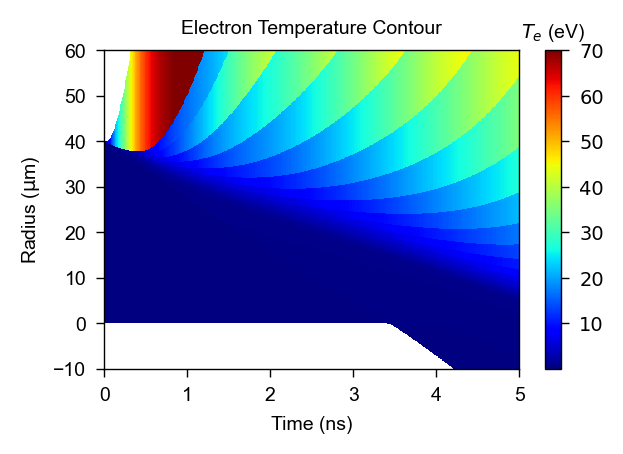

In [162]:
elec_temp = data_dict['elec_temperature']

ax = plot_electron_temp_pcolormesh(time_edges, radius_edges, elec_temp)
ax.set_xlim(0,5)
ax.set_ylim(-10,60)